<a href="https://colab.research.google.com/github/PyCharger/GBC_homeworks/blob/Homeworks/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bertopic

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from scipy import linalg
import gensim
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from bertopic import BERTopic
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

%matplotlib inline
np.set_printoptions(suppress=True)

In [3]:
file = "Crime And Punishment.txt"
documents = open(file).read().split('\n')
documents = list(filter(None, documents))
stop_words = set(STOPWORDS)
for i in documents:
    i = [w for w in i if w not in stop_words]
documents

['Annotation',
 '«Преступление и наказание» – гениальный роман, главные темы которого: преступление и наказание, жертвенность и любовь, свобода и гордость человека – обрамлены почти детективным сюжетом.',
 'Многократно экранизированный и не раз поставленный на сцене, он и по сей день читается на одном дыхании.',
 '* * *',
 'Часть перваяI',
 'II',
 'III',
 'IV',
 'V',
 'VI',
 'VII',
 'Часть втораяI',
 'II',
 'III',
 'IV',
 'V',
 'VI',
 'VII',
 'Часть третьяI',
 'II',
 'III',
 'IV',
 'V',
 'VI',
 'Часть четвертаяI',
 'II',
 'III',
 'IV',
 'V',
 'VI',
 'Часть пятаяI',
 'II',
 'III',
 'IV',
 'V',
 'Часть шестаяI',
 'II',
 'III',
 'IV',
 'V',
 'VI',
 'VII',
 'VIII',
 'ЭпилогI',
 'II',
 'notes1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',


In [4]:
model = BERTopic(language="russian", nr_topics = 20)

topics, probs = model.fit_transform(documents)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
freq = model.get_topic_info()
freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1451,-1_не_что_на_он,"[не, что, на, он, то, как, это, да, все, так]",[– Штука в том: я задал себе один раз такой во...
1,0,740,0_не_раскольников_что_он,"[не, раскольников, что, он, то, как, это, на, ...","[– То-то наплевать! Изверились, да и думаете, ..."
2,1,475,1_она_что_не_ее,"[она, что, не, ее, как, на, то, же, но, соня]","[…Ну да уж пусть мамаша, уж бог с ней, она уж ..."
3,2,356,2_петрович_что_не_то,"[петрович, что, не, то, на, петр, как, ивановн...","[Развеселившись, Катерина Ивановна тотчас же у..."
4,3,215,3_да_что_ну_ты,"[да, что, ну, ты, вы, митька, же, чего, это, к...","[– Да., – Да что ты это?, – Да, а что?]"
5,4,151,4_он_на_было_но,"[он, на, было, но, не, как, что, дверь, его, то]",[Но все обошлось благополучно. Дверь в дворниц...
6,5,108,5_он_его_не_но,"[он, его, не, но, то, ему, на, было, как, что]",[Дуня же была ему просто необходима; отказатьс...
7,6,82,6_ii_iii_iv_vi,"[ii, iii, iv, vi, часть, cinq, sous, шестая, ч...","[II, II, II]"
8,7,79,7_подбегая_10_88_78,"[подбегая, 10, 88, 78, 90, 91, 92, 93, 94, 95]","[60, 69, – Тридцать копеек всего-с, – отвечал ..."
9,8,65,8_чаю_не_что_на,"[чаю, не, что, на, чай, то, да, пьян, было, ив...","[– Эх, что ж, что я убежден? Ведь все это пока..."


In [6]:
model.get_topic(freq.iloc[6]["Topic"])

[('он', 0.05313538073736476),
 ('его', 0.037079903508097894),
 ('не', 0.02669801076441957),
 ('но', 0.025506828940816517),
 ('то', 0.024174785528228875),
 ('ему', 0.024054384555385232),
 ('на', 0.022822056278137565),
 ('было', 0.021949248973496108),
 ('как', 0.021922528749624578),
 ('что', 0.02183215593197921)]

In [7]:
similar_topics, similarity = \
model.find_topics("лебезятников", top_n = 3)
print("Most Similar Topic Info: \n{}".format(model.get_topic(similar_topics[0])))

Most Similar Topic Info: 
[('лебезятников', 0.4998452599600536), ('нему', 0.08073769184691064), ('рассвирепел', 0.07838511865153001), ('поравнявшись', 0.07838511865153001), ('всполошился', 0.07838511865153001), ('отколотил', 0.07838511865153001), ('окликнули', 0.07838511865153001), ('слушавшая', 0.07838511865153001), ('подскочил', 0.07230603435093066), ('подвернулся', 0.07230603435093066)]


In [8]:
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Error downloading 'omw-1.4' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/corpora/omw-1.4.zip>:   [SSL:
[nltk_data]     DECRYPTION_FAILED_OR_BAD_RECORD_MAC] decryption failed
[nltk_data]     or bad record mac (_ssl.c:2578)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
stemmer = SnowballStemmer("russian")
lemma = []
for i in documents:
    tokens = word_tokenize(i)
    lemma.append(' '.join([stemmer.stem(word) for word in tokens]))

In [10]:
model = BERTopic(language="russian", nr_topics = 20)

topics, probs = model.fit_transform(lemma)

In [11]:
freq = model.get_topic_info()
freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1804,-1_не_он_что_эт,"[не, он, что, эт, как, на, так, был, ег, все]","[– тепер я совершен все себ уясн , – продолжа ..."
1,0,627,0_да_что_не_вы,"[да, что, не, вы, эт, ты, так, вам, ну, как]","[– брат , я тепер зна все , все . мне дмитр пр..."
2,1,467,1_не_что_эт_он,"[не, что, эт, он, как, на, так, все, петрович,...","[– эт не совс так у мен , – нача он прост и ск..."
3,2,375,2_он_на_был_не,"[он, на, был, не, двер, но, ег, что, вдруг, как]",[с замиран сердц и нервн дрож подошел он к пре...
4,3,148,3_он_что_не_вы,"[он, что, не, вы, проговор, сказа, спрос, все,...","[– так вот , дмитр прокофьич , я бы очен , оче..."
5,4,83,4_сон_нет_не_так,"[сон, нет, не, так, спит, что, эт, прошепта, н...","[– н-нет , – прошепта сон ., – нет , – прошепт..."
6,5,83,5_iii_iv_ii_vi,"[iii, iv, ii, vi, част, sous, cinq, третьяi, n...","[III, IV, III]"
7,6,82,6_подбег_10_92_94,"[подбег, 10, 92, 94, 95, 78, 93, 90, 91, 80]","[25, 27, – тридца копеек всего-с , – отвеча то..."
8,7,46,7_лизавет_сестр_не_ваш,"[лизавет, сестр, не, ваш, теб, уб, вы, сестриц...",[– эт я уб тогд старуху-чиновниц и сестр е лиз...
9,8,38,8_улыбк_усмехнул_улыбнул_злобн,"[улыбк, усмехнул, улыбнул, злобн, он, искрив, ...",[раскольник грустн замолча и поник голов ; он ...


In [12]:
similar_topics, similarity = \
model.find_topics("чиновник", top_n = 3)
print("Most Similar Topic Info: \n{}".format(model.get_topic(similar_topics[0])))

Most Similar Topic Info: 
[('дом', 0.13474355193306203), ('контор', 0.10239312102481944), ('чиновник', 0.06765606001571697), ('проговор', 0.06700428565466153), ('мад', 0.06463504859427557), ('хозяйк', 0.060979977223546415), ('сосед', 0.06041555986035503), ('недалек', 0.05390601169087281), ('отсюд', 0.05252760769423833), ('зде', 0.052257384551498406)]


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [27]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(documents)
X

<3968x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 72633 stored elements in Compressed Sparse Row format>

In [18]:
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=10, random_state=42)

In [19]:
for cluster_idx in range(num_clusters):
    cluster_documents = [documents[i] for i, label in enumerate(kmeans.labels_) if label == cluster_idx]
    print(f"Кластер {cluster_idx + 1}:")
    for doc in cluster_documents:
        print(f" - {doc}")

Кластер 1:
 - «Может, впрочем, она и всегда такая, да я в тот раз не заметил», – подумал он с неприятным чувством.
 - Старуха полезла в карман за ключами и пошла в другую комнату за занавески. Молодой человек, оставшись один среди комнаты, любопытно прислушивался и соображал. Слышно было, как она отперла комод. «Должно быть, верхний ящик, – соображал он. – Ключи она, стало быть, в правом кармане носит… Все на одной связке, в стальном кольце… И там один ключ есть всех больше, втрое, с зубчатою бородкой, конечно не от комода… Стало быть, есть еще какая-нибудь шкатулка али укладка[4]… Вот это любопытно. У укладок всё такие ключи… А впрочем, как это подло все…»
 - – Ну-с, – продолжал оратор, солидно и даже с усиленным на этот раз достоинством, переждав опять последовавшее в комнате хихикание. – Ну-с, я пусть свинья, а она дама! Я звериный образ имею, а Катерина Ивановна, супруга моя, – особа образованная и урожденная штаб-офицерская дочь. Пусть, пусть я подлец, она же и сердца высокого, и 

In [22]:
clustering = DBSCAN(eps=1, min_samples=3).fit(X)
clustering.labels_

array([ 0,  0, -1, ...,  0,  0,  0])

In [34]:
algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=42))
algorithms.append(SpectralClustering(n_clusters=10, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10))
algorithms.append(AgglomerativeClustering(n_clusters = 10, metric = 'l2',linkage='average'))
algorithms.append(AgglomerativeClustering(n_clusters=10, metric = 'manhattan',linkage='average'))
data = []
for algo in algorithms:
    algo.fit(X.toarray())
    data.append(({
        'DB': metrics.davies_bouldin_score(X.toarray(), algo.labels_),
        'CH': metrics.calinski_harabasz_score(X.toarray(), algo.labels_),
        'Silhouette': metrics.silhouette_score(X.toarray(), algo.labels_)}))

results = pd.DataFrame(data=data, columns=['DB', 'CH',
                                           'Silhouette'],
                       index=['K-means', 'Spectral', 'Agg1','Agg2', 'Agg3'])

results

,DB,CH,Silhouette
K-means,5.850981,27.695244,0.022349
Spectral,2.308977,11.725360,-0.010107
Agg1,5.252215,16.566311,0.009203
Agg2,2.131762,3.815983,0.023090
Agg3,1.153003,0.950891,-0.057744


In [35]:
pip install clustergram

In [37]:
from clustergram import Clustergram
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

sns.set(style='whitegrid')

K=1 skipped. Mean computed from data directly.
K=2 fitted in 283.895 seconds.
K=3 fitted in 371.073 seconds.
K=4 fitted in 351.709 seconds.
K=5 fitted in 410.810 seconds.
K=6 fitted in 451.850 seconds.
K=7 fitted in 489.307 seconds.
K=8 fitted in 472.867 seconds.
K=9 fitted in 532.276 seconds.


Text(0.5, 1.0, 'K-Means (scikit-learn)')

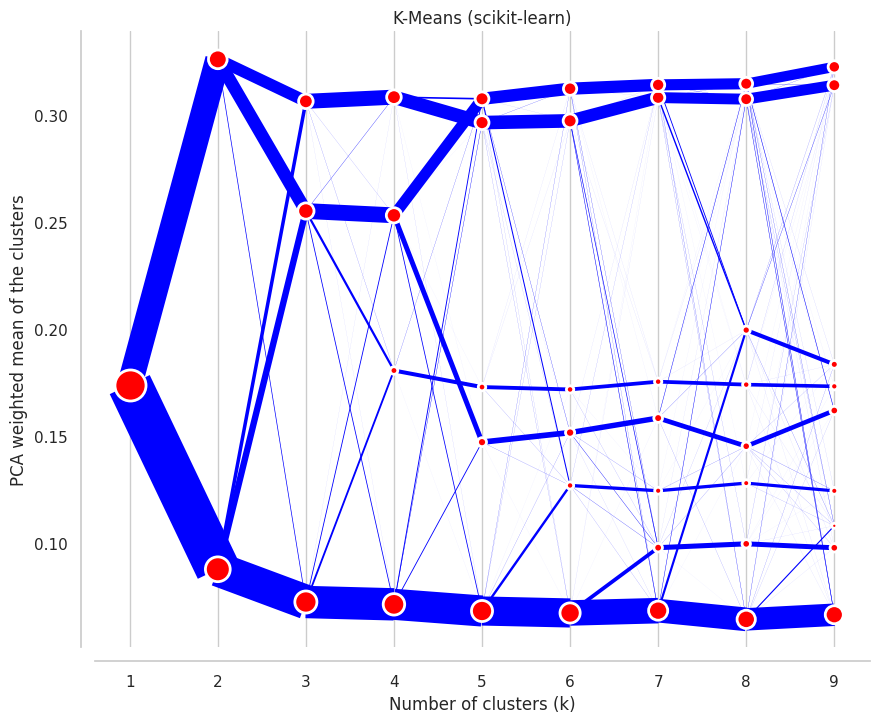

In [39]:
cgram = Clustergram(range(1, 10), n_init=1000)
cgram.fit(X.toarray())

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color='blue'),
    cluster_style={"color": 'red'},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')